# Background

- First run of changing B field
- Only have 3 set points (COVID-19)

# Code

## Imports

In [4]:
#%load_ext autoreload
#%autoreload 2

In [1]:
import math
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser
from sys import getsizeof
import re

import operator
from scipy import stats
import scipy.optimize as optimization
import lmfit as lm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.express as px
init_notebook_mode(True)

#import seaborn as sns

#from wand.image import Image as WImage

from hallprobecalib import hpc_ext_path
#from hallprobecalib.hpcplots import scatter2d,scatter3d,histo,py_profile
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

In [2]:
# nicer plot formatting
def config_plots():
    #must run twice for some reason (glitch in Jupyter)
    for i in range(2):
        plt.rcParams['figure.figsize'] = [10, 8] # larger figures
        plt.rcParams['axes.grid'] = True         # turn grid lines on
        plt.rcParams['axes.axisbelow'] = True    # put grid below points
        plt.rcParams['grid.linestyle'] = '--'    # dashed grid
        plt.rcParams.update({'font.size': 18})   # increase plot font size
        
config_plots()

In [3]:
make_plots = True

In [4]:
plotdir = hpc_ext_path+'plots/hall_probe_B/2020-03-16/'

In [5]:
pkl_dir = hpc_ext_path+"datafiles/hall_probe_B/"
pkl_file_slow = "hall_B_change.run01.raw.slow.pkl"

In [6]:
probe = '6A0000000D61333A'

In [7]:
df = pd.read_pickle(pkl_dir+pkl_file_slow)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ckampa/data/hallprobecalib_extras/datafiles/hall_probe_B/hall_B_change.run01.raw.slow.pkl'

In [8]:
df['seconds_delta'].head(10)

Datetime
2020-03-16 12:47:36      0.0
2020-03-16 12:48:36     60.0
2020-03-16 12:49:36    120.0
2020-03-16 12:50:36    180.0
2020-03-16 12:51:36    240.0
2020-03-16 12:52:36    300.0
2020-03-16 12:53:36    360.0
2020-03-16 12:54:36    420.0
2020-03-16 12:55:36    480.0
2020-03-16 12:56:36    540.0
Name: seconds_delta, dtype: float64

In [9]:
def pplot(fig):
    pio.write_image(fig, 'temp.pdf')
    img = WImage(filename='temp.pdf')
    return img

## Cleaning

In [71]:
directory = "/home/ckampa/Dropbox/LogFiles/"
filename = '2020-03-16 124657slow.txt'
#filename_slow = '2020-01-27 115227slow.txt'
#filename_slow_2 = '2020-02-03 130728slow.txt'

In [72]:
df = pd.read_csv(directory+filename)
df.columns = df.columns.str.lstrip(" ")
#df.drop("", axis=1, inplace=True)
dates = [parser.parse(row.Time) for row in df.itertuples()]# if isdatetime(row.Time.values[0])]
df["Datetime"] = pd.to_datetime(dates)#.astype("str")
df = df.set_index("Datetime")

In [73]:
df

Time  Magnet Current [A]  \
Datetime                                                         
2020-03-16 12:47:36  3/16/2020 12:47:36 PM          134.441157   
2020-03-16 12:48:36  3/16/2020 12:48:36 PM          134.441100   
2020-03-16 12:49:36  3/16/2020 12:49:36 PM          134.441100   
2020-03-16 12:50:36  3/16/2020 12:50:36 PM          134.441157   
2020-03-16 12:51:36  3/16/2020 12:51:36 PM          134.441100   
2020-03-16 12:52:36  3/16/2020 12:52:36 PM          134.441043   
2020-03-16 12:53:36  3/16/2020 12:53:36 PM          134.441157   
2020-03-16 12:54:36  3/16/2020 12:54:36 PM          134.441100   
2020-03-16 12:55:36  3/16/2020 12:55:36 PM          134.441100   
2020-03-16 12:56:36  3/16/2020 12:56:36 PM          134.441100   
2020-03-16 12:57:36  3/16/2020 12:57:36 PM          134.441157   
2020-03-16 12:58:36  3/16/2020 12:58:36 PM          134.441100   
2020-03-16 12:59:36  3/16/2020 12:59:36 PM          134.441100   
2020-03-16 13:00:36   3/16/2020 1:00:36 PM          134.441213   
2020-03-16 13:01:36   3/16/2020 1:01:36 PM          134.441100   
2020-03-16 13:02:36   3/16/2020 1:02:36 PM          134.441157   
2020-03-16 13:03:36   3/16/2020 1:03:36 PM          134.441213   
2020-03-16 13:04:36   3/16/2020 1:04:36 PM          134.441270   
2020-03-16 13:05:36   3/16/2020 1:05:36 PM          134.441157   
2020-03-16 13:06:36   3/16/2020 1:06:36 PM          134.441157   
2020-03-16 13:07:36   3/16/2020 1:07:36 PM          134.441157   
2020-03-16 13:08:36   3/16/2020 1:08:36 PM          134.441383   
2020-03-16 13:09:36   3/16/2020 1:09:36 PM          134.441213   
2020-03-16 13:10:36   3/16/2020 1:10:36 PM          134.441440   
2020-03-16 13:11:36   3/16/2020 1:11:36 PM          134.441270   
2020-03-16 13:12:36   3/16/2020 1:12:36 PM          134.441440   
2020-03-16 13:13:36   3/16/2020 1:13:36 PM          134.441383   
2020-03-16 13:14:36   3/16/2020 1:14:36 PM          134.441383   
2020-03-16 13:15:36   3/16/2020 1:15:36 PM          134.441383   
2020-03-16 13:16:36   3/16/2020 1:16:36 PM          134.441440   
...                                    ...                 ...   
2020-03-20 13:34:57   3/20/2020 1:34:57 PM          153.650420   
2020-03-20 13:35:57   3/20/2020 1:35:57 PM          153.650477   
2020-03-20 13:36:57   3/20/2020 1:36:57 PM          153.650420   
2020-03-20 13:37:57   3/20/2020 1:37:57 PM          153.650477   
2020-03-20 13:38:57   3/20/2020 1:38:57 PM          153.650420   
2020-03-20 13:39:57   3/20/2020 1:39:57 PM          153.650420   
2020-03-20 13:40:57   3/20/2020 1:40:57 PM          153.650363   
2020-03-20 13:41:57   3/20/2020 1:41:57 PM          153.650420   
2020-03-20 13:42:57   3/20/2020 1:42:57 PM          153.650193   
2020-03-20 13:43:57   3/20/2020 1:43:57 PM          153.650420   
2020-03-20 13:44:58   3/20/2020 1:44:58 PM          153.650420   
2020-03-20 13:45:57   3/20/2020 1:45:57 PM          153.650307   
2020-03-20 13:46:57   3/20/2020 1:46:57 PM          153.650363   
2020-03-20 13:47:57   3/20/2020 1:47:57 PM          153.650250   
2020-03-20 13:48:57   3/20/2020 1:48:57 PM          153.650307   
2020-03-20 13:49:57   3/20/2020 1:49:57 PM          153.650307   
2020-03-20 13:50:57   3/20/2020 1:50:57 PM          153.650307   
2020-03-20 13:51:57   3/20/2020 1:51:57 PM          153.650363   
2020-03-20 13:52:57   3/20/2020 1:52:57 PM          153.650250   
2020-03-20 13:53:57   3/20/2020 1:53:57 PM          153.650193   
2020-03-20 13:54:57   3/20/2020 1:54:57 PM          153.650250   
2020-03-20 13:55:57   3/20/2020 1:55:57 PM          153.650363   
2020-03-20 13:56:57   3/20/2020 1:56:57 PM          153.650193   
2020-03-20 13:57:57   3/20/2020 1:57:57 PM          153.650137   
2020-03-20 13:58:57   3/20/2020 1:58:57 PM          153.650137   
2020-03-20 13:59:58   3/20/2020 1:59:58 PM          153.650193   
2020-03-20 14:00:57   3/20/2020 2:00:57 PM          153.650193   
2020-03-20 14:01:57   3/20/2020 2:01:57 PM          153.650137   
2020-03-20 1

In [74]:
fig = scatter2d(df.index, df["NMR [T]"], inline=False)

In [ ]:
probes = np.array([])
for col in df.columns:
    #print(df_fast[col].dtype)
    if ("Raw" in col) or ("Cal" in col):#type(df[col].iloc[0]) is np.float64:
        #print(f"{col}")#": mean: {df[col].mean()}")
        probes = np.append(probes, col[:16])
probes = list(np.unique(probes))
#print(probes)

In [ ]:
print(probes)

['6A0000000D61333A', 'C50000000D5E473A', 'C90000000D53983A', 'DF0000000D5E803A']


In [ ]:
probe = probes[0]

In [ ]:
probe

'6A0000000D61333A'

In [ ]:
for col in df.columns:
    if type(df[col].iloc[0]) is np.float64 and "Cal_" in col:
        print(f"{col}: mean: {df[col].mean()}")

DF0000000D5E803A_Cal_X: mean: 1.5559838101764605e-05
DF0000000D5E803A_Cal_Y: mean: 3.5233754668494084e-05
DF0000000D5E803A_Cal_Z: mean: 4.9251535206441665e-05
C90000000D53983A_Cal_X: mean: 0.00018054954017474728
C90000000D53983A_Cal_Y: mean: -0.00020825022905602195
C90000000D53983A_Cal_Z: mean: 0.00019630378824738733
C50000000D5E473A_Cal_X: mean: 3.56257049854377e-06
C50000000D5E473A_Cal_Y: mean: -2.602036748329622e-05
C50000000D5E473A_Cal_Z: mean: 7.9175539146822e-05
6A0000000D61333A_Cal_X: mean: 0.10666192321295184
6A0000000D61333A_Cal_Y: mean: 0.000993835082576666
6A0000000D61333A_Cal_Z: mean: -0.001976583148363886
DF0000000D5E803A_Cal_T: mean: 16.27317440465993
C90000000D53983A_Cal_T: mean: 15.580569984581123
C50000000D5E473A_Cal_T: mean: 16.012105019701902
6A0000000D61333A_Cal_T: mean: 14.036510878876134


- Looks like maybe probe "6A0000000D61333A" is in the field

In [ ]:
fig = scatter2d(3*[df.index], [df[f"{probe}_Cal_{B}"] for B in ["X", "Y", "Z"]], inline=False)

### Slow Control Data Cleaning

In [ ]:
for probe in probes:
    for t in ["Cal", "Raw"]:
        df[f"{probe}_{t}_Bmag"] = (df[f"{probe}_{t}_X"]**2+df[f"{probe}_{t}_Y"]**2+df[f"{probe}_{t}_Z"]**2)**(1/2)
        df[f"{probe}_{t}_Res"] = df[f"{probe}_{t}_Bmag"] - df['NMR [T]']
        df[f"{probe}_{t}_Res_Rel"] = (df[f"{probe}_{t}_Bmag"] - df['NMR [T]']) / df['NMR [T]']

In [ ]:
for B in ["X", "Y", "Z"]:
    for probe in probes:
        for t in ["Cal", "Raw"]:
            #df[f"{probe}_{t}_Bmag"] = (df[f"{probe}_{t}_X"]**2+df[f"{probe}_{t}_Y"]**2+df[f"{probe}_{t}_Z"]**2)**(1/2)
            df[f"{probe}_{t}_{B}_Res"] = df[f"{probe}_{t}_{B}"] - df['NMR [T]']
            df[f"{probe}_{t}_{B}_Res_Rel"] = (df[f"{probe}_{t}_{B}"] - df['NMR [T]']) / df['NMR [T]']

In [ ]:
df["seconds_delta"] = (df.index - df.index[0]).total_seconds()
df["hours_delta"] = (df.index - df.index[0]).total_seconds()/60**2
df["days_delta"] = (df.index - df.index[0]).total_seconds()/(24*60**2)

In [ ]:
for t in ["Cal", "Raw"]:
    for probe in probes:
        df[f"{probe}_{t}_Transverse"] = (df[f"{probe}_Cal_X"]**2+df[f"{probe}_Cal_Y"]**2)**(1/2)
        df[f"{probe}_{t}_Theta"] = np.arccos(df[f"{probe}_Cal_Z"]/df[f"{probe}_Cal_Bmag"])
        df[f"{probe}_{t}_Phi"] = np.arccos(df[f"{probe}_Cal_X"]/df[f"{probe}_Cal_Transverse"])

In [ ]:
# raw
for probe in probes:
    df[f"{probe}_Raw_Bmag"] = (df[f"{probe}_Raw_X"]**2+df[f"{probe}_Raw_Y"]**2+df[f"{probe}_Raw_Z"]**2)**(1/2)

for probe in probes:
    df[f"{probe}_Raw_Transverse"] = (df[f"{probe}_Raw_X"]**2+df[f"{probe}_Raw_Y"]**2)**(1/2)
    df[f"{probe}_Raw_Theta"] = np.arccos(df[f"{probe}_Raw_Z"]/df[f"{probe}_Raw_Bmag"])
    df[f"{probe}_Raw_Phi"] = np.arccos(df[f"{probe}_Raw_X"]/df[f"{probe}_Raw_Transverse"])

In [ ]:
# NOTE TAKES ~3 MINUTES TO RUN AT THIS POINT (02-03-2020)
if make_plots:
    ## TIME PLOTS
    for col in df.columns:
        fig = scatter2d(df.index, df[col], markers=False, lines=True, show_plot=False) 
        pio.write_image(fig, plotdir+f"time/all/{col}_vs_time.pdf")
        pio.write_image(fig, plotdir+f"time/all/{col}_vs_time.png")
    
    ## PLOT HISTOS
    for probe in probes:
        for t in ["Cal", "Raw"]:
            fig = histo(df[f"{probe}_{t}_Bmag"], bins=50, show_plot=False)
            pio.write_image(fig, plotdir+f"histo/{probe}_{t}_Bmag.pdf")
            pio.write_image(fig, plotdir+f"histo/{probe}_{t}_Bmag.png")

    ## RES HISTOS
    for t in ["Cal", "Raw"]:
        for probe in probes:
            for B in ["X","Y","Z"]:
                fig = histo(df[f"{probe}_{t}_{B}_Res"], bins=50, show_plot=False)
                pio.write_image(fig, plotdir+f"histo/residuals/component/{probe}_{t}_{B}_Res.pdf")
                pio.write_image(fig, plotdir+f"histo/residuals/component/{probe}_{t}_{B}_Res.png")

    ## REL_RES HISTOS
    for t in ["Cal", "Raw"]:
        for probe in probes:
            for B in ["X","Y","Z"]:
                fig = histo(df[f"{probe}_{t}_{B}_Res_Rel"], bins=50, show_plot=False)
                pio.write_image(fig, plotdir+f"histo/relative_residuals/component/{probe}_{t}_{B}_Res_Rel.pdf")
                pio.write_image(fig, plotdir+f"histo/relative_residuals/component/{probe}_{t}_{B}_Res_Rel.png")

    ## BMAG RES HISTOS
    for res in ["Res", "Res_Rel"]:
        if res == "Res":
            p = "residuals"
        else:
            p = "relative_residuals"
        for t in ["Cal", "Raw"]:
            for probe in probes:
                #for B in ["X","Y","Z"]:
                fig = histo(df[f"{probe}_{t}_{res}"], bins=50, show_plot=False)
                pio.write_image(fig, plotdir+f"histo/{p}/{probe}_{t}_Bmag_{res}.pdf")
                pio.write_image(fig, plotdir+f"histo/{p}/{probe}_{t}_Bmag_{res}.png")

    ## PLOT HISTO ANGLE
    for probe in probes:
        for angle in ["Transverse", "Theta", "Phi"]:
            fig = histo(df[f"{probe}_Cal_{angle}"], bins=30, show_plot=False)
            pio.write_image(fig, plotdir+f"histo/angles/{probe}_Cal_{angle}.pdf")
            pio.write_image(fig, plotdir+f"histo/angles/{probe}_Cal_{angle}.png")

    ## PLOT ANGLE
    for probe in probes:
        for angle in ["Transverse", "Theta", "Phi"]:
            fig = scatter2d(df.index, df[f"{probe}_Cal_{angle}"], show_plot=False)
            pio.write_image(fig, plotdir+f"time/angles/{probe}_Cal_{angle}.pdf")
            pio.write_image(fig, plotdir+f"time/angles/{probe}_Cal_{angle}.png")

    ## PLOT ANGLES RAW
    for probe in probes:
        for angle in ["Transverse", "Theta", "Phi"]:
            fig = histo(df[f"{probe}_Raw_{angle}"], bins=30, show_plot=False)
            pio.write_image(fig, plotdir+f"histo/angles/{probe}_Raw_{angle}.pdf")
            pio.write_image(fig, plotdir+f"histo/angles/{probe}_Raw_{angle}.png")

    for probe in probes:
        for angle in ["Transverse", "Theta", "Phi"]:
            fig = scatter2d(df.index, df[f"{probe}_Raw_{angle}"], show_plot=False)
            pio.write_image(fig, plotdir+f"time/angles/{probe}_Raw_{angle}.pdf")
            pio.write_image(fig, plotdir+f"time/angles/{probe}_Raw_{angle}.png")

In [ ]:
df.to_pickle(pkl_dir+pkl_file_slow)

In [ ]:
getsizeof(df) / 1000/1000

In [ ]:
df.info()

## Plotting

### Gen Plots

In [10]:
N = 2
df["Diff_Current"] = np.concatenate([np.diff(df["Magnet Current [A]"], n=N), N*[0]])

In [64]:
#fig = scatter2d(df.index, df.Diff_Current, inline=False)

In [11]:
c = abs(df["Diff_Current"]) < 1e-3

In [12]:
c.sum()

5828

In [13]:
len(df)

5837

In [14]:
df = df[c]

In [69]:
#fig = scatter2d(df.index, df.Diff_Current, inline=False)

In [15]:
nmr = df["NMR [T]"] > 0.01

#nmr = (df[f"{probe}_Cal_Bmag"] > 0.5) & (df["Magnet Current [A]"] > 1)

In [16]:
df_ = df[~nmr]
df = df[nmr]

In [109]:
len(df)

706

In [110]:
len(df_)

5131

In [68]:
fig = histo(df[f"{probe}_Cal_Res_Rel"], bins=34, autobin=True, show_plot=False)
fig.update_layout(xaxis_title=r"$(B_{\mathrm{Hall}} - B_{\mathrm{NMR}}) / B_{\mathrm{NMR}}$")
pio.write_image(fig, plotdir+"histo/hist_res_rel.pdf")
pio.write_image(fig, plotdir+"histo/hist_res_rel.png")

In [81]:
fig.data[0].name[36:]

'mean: -8.5609300E-04<br>std:     2.700E-05<br>range: 1.684E-04<br>count: 701'

In [19]:
c = df[f"{probe}_Cal_Bmag"] > 0.8

In [85]:
high_frac = df[c][f"{probe}_Cal_Bmag"].mean() / df[c]["NMR [T]"].mean()

In [84]:
low_frac = df[~c][f"{probe}_Cal_Bmag"].mean() / df[~c]["NMR [T]"].mean()

In [86]:
low_frac, high_frac

(0.9991477784496814, 0.9991185969487559)

In [20]:
df["color"] = c

In [37]:
b_true = round(df[c]["NMR [T]"].mean(), 2)#[f"{probe}_Cal_Bmag"].mean()

In [38]:
b_false = round(df[~c]["NMR [T]"].mean(), 2)#[f"{probe}_Cal_Bmag"].mean()

In [39]:
b_true, b_false

(0.82, 0.78)

In [40]:
B = []
for c_ in c:
    if c_:
        B.append(b_true)
    else:
        B.append(b_false)

In [41]:
df["NMR_avg"] = np.array(B)

In [45]:
fig = px.histogram(df, x=f"{probe}_Cal_Res_Rel", color="NMR_avg")
fig.update_layout(xaxis_title=r"$(B_{\mathrm{Hall}} - B_{\mathrm{NMR}}) / B_{\mathrm{NMR}}$")

In [46]:
pio.write_image(fig, plotdir+"histo/hist_res_rel_color.pdf")
pio.write_image(fig, plotdir+"histo/hist_res_rel_color.png")

In [53]:
fig = scatter2d(df["NMR [T]"], df[f"{probe}_Cal_Res_Rel"], size_list=4, lines=False, markers=True, show_plot=False)
fig.update_layout(yaxis_title=r"$(B_{\mathrm{Hall}} - B_{\mathrm{NMR}}) / B_{\mathrm{NMR}}$")
fig.update_layout(xaxis_title=r"$B_{\mathrm{NMR}} [\mathrm{T}]$")
fig.update_layout(showlegend=False)
pio.write_image(fig, plotdir+"time/res_rel_vs_NMR.pdf")
pio.write_image(fig, plotdir+"time/res_rel_vs_NMR.png")

In [111]:
fig = scatter2d(df["NMR [T]"],df[f"{probe}_Cal_Res_Rel"], size_list=4, lines=False, markers=True, inline=False)

In [114]:
fig = scatter2d(df["NMR [T]"],df[f"{probe}_Cal_Res"], size_list=4, lines=False, markers=True, inline=False)

In [112]:
fig = histo(df[f"{probe}_Cal_Res_Rel"], bins=50, inline=False)

In [113]:
fig = histo(df[f"{probe}_Cal_Res"], bins=50, inline=False)

In [74]:
fig = scatter2d(df[f"{probe}_Cal_T"], df["NMR [T]"], lines=False, markers=True, inline=False)

In [ ]:
fig = scatter2d(df["Yoke (center magnet)"], df["NMR [T]"], lines=False, markers=True, inline=False)

In [ ]:
fig = scatter2d(df["Magnet Current [A]"], df["NMR [T]"], size_list=6, lines=False, markers=True, inline=False)

In [75]:
fig = scatter2d(df["Magnet Current [A]"], df[f"{probe}_Cal_Bmag"], size_list=6, lines=False, markers=True, inline=False)

In [76]:
x = df["Magnet Current [A]"]
y = df[f"{probe}_Cal_Bmag"]

In [80]:
G = np.concatenate([x, np.ones_like(x)]).reshape(2, -1).T

In [81]:
G.shape

(768, 2)

In [88]:
GtGinv_Gt = np.linalg.inv(G.T @ G) @ G.T

In [91]:
m = np.dot(GtGinv_Gt, y)

In [92]:
m

array([0.00508539, 0.09101716])

In [93]:
xs = np.linspace(0, x.max(), 100)
ys = m[0] * xs + m[1]

In [95]:
xs = pd.Series(xs, name="xs")
ys = pd.Series(ys, name="ys")

In [104]:
fig = scatter2d(x, y, size_list=4, lines=False, markers=True, inline=False, show_plot=False)
fig.add_trace(go.Scatter(x=xs, y=ys, name='Fit', opacity=0.5,
                         line=dict(color='firebrick', width=1,
                                   dash='dash')));
#fig2 = scatter2d(xs, ys, inline=False, show_plot=False)
#fig2. 
#fig.add_traces([fig2.data[0]]);

In [105]:
plot(fig)

'temp-plot.html'

In [87]:
y.shape

(768,)

In [10]:
fig = scatter2d( df["NMR [T]"],df["DF0000000D5E803A_Cal_Bmag"], inline=False)

In [15]:
fig = scatter2d( df["DF0000000D5E803A_Cal_T"],(df["DF0000000D5E803A_Cal_X"]-df["NMR [T]"])/df["NMR [T]"], markers=True, lines=False, inline=False)

In [30]:
df.tail(1)

Time  Magnet Current [A]  \
Datetime                                                         
2020-02-12 11:30:27  2/12/2020 11:30:27 AM            240.0706   

                     Magnet Voltage [V]  Coil 1 (new)  Coil 2 (old)  \
Datetime                                                              
2020-02-12 11:30:27           28.651067     32.329288     30.131769   

                     LCW in Coil1  LCW out Coil 1  LCW in Coil 2  \
Datetime                                                           
2020-02-12 11:30:27       8.32542       10.983446      13.566287   

                     LCW out Coil 2       Yoke            ...             \
Datetime                                                  ...              
2020-02-12 11:30:27       14.512237  22.224464            ...              

                     DF0000000D5E803A_Cal_Phi  \
Datetime                                        
2020-02-12 11:30:27                   1.56294   

                     6A0000000D61333A_Raw_Transverse  \
Datetime                                               
2020-02-12 11:30:27                       539.726783   

                     6A0000000D61333A_Raw_Theta  6A0000000D61333A_Raw_Phi  \
Datetime                                                                    
2020-02-12 11:30:27                    0.128991                  0.757882   

                     C50000000D5E473A_Raw_Transverse  \
Datetime                                               
2020-02-12 11:30:27                     59928.373313   

                     C50000000D5E473A_Raw_Theta  C50000000D5E473A_Raw_Phi  \
Datetime                                                                    
2020-02-12 11:30:27                    1.254132                  1.244276   

                     DF0000000D5E803A_Raw_Transverse  \
Datetime                                               
2020-02-12 11:30:27                     3.387744e+06   

                     DF0000000D5E803A_Raw_Theta  DF0000000D5E803A_Raw_Phi  
Datetime                                                                   
2020-02-12 11:30:27                     1.56076                  1.113235  

[1 rows x 150 columns]

In [31]:
len(df)

23019

In [32]:
len(df) * 50 / 60 / 60 / 24

13.321180555555555

In [33]:
fig = histo(df["NMR [T]"], bins=50, inline=False)

In [34]:
fig = scatter2d(3*[df.index], [df[col+"_Cal_Bmag"] for col in probes], inline=False);

In [35]:
fig = scatter2d(2*[df.index], [df["NMR [T]"], df[f"{probe}_Cal_Bmag"]], show_plot=False);

In [36]:
plot(fig)

'temp-plot.html'

In [37]:
fig = scatter2d(df.index, df[f"{probe}_Cal_Res_Rel"], show_plot=False);

In [38]:
plot(fig)

'temp-plot.html'

In [39]:
fig = scatter2d(df[f"{probe}_Cal_T"], df[f"{probe}_Cal_Res_Rel"], df.days_delta, inline=False);

In [40]:
fig = scatter2d(df["Roof"], df[f"{probe}_Cal_Res_Rel"], df.days_delta, inline=False);

~ -2e-4 change in residual after changing temperature (+7 deg C).

**(old, early Run06)**
~ -5e-5 change in residual after changing temperature (+4 deg C).

In [41]:
fig = histo(df[f"{probe}_Cal_Res_Rel"], bins=75, show_plot=False);
plot(fig)
#fig = histo(df[f"{probe}_Cal_Res_Rel"], bins=50, yscale='log')

'temp-plot.html'

In [42]:
df["day"] = df.index.day

In [43]:
fig = px.histogram(df, x=f"{probe}_Cal_Res_Rel", color="day")

In [44]:
fig.update_layout(
    autosize=False,
    width=1800,
    height=800
    #margin=dict(l=20, r=20, t=20, b=20),
    #padding=dict(l=20, r=20, t=20, b=20),
    #paper_bgcolor="LightSteelBlue",
);

In [45]:
#fig.show()

In [46]:
plot(fig)

'temp-plot.html'

### Temps

In [47]:
temps_ch = [a for a in df.columns if ("CH" in a) and int(a[-2:])<21]# or "HVAC" in a]
temps_ch.append("Hall Element")
temps_ch.append("Floor")
temps_ch.append("Roof")
temps_ch.append("Yoke")
temps_ch.append("Yoke (center magnet)")
temps_ch.append(f"{probe}_Cal_T")

In [48]:
#temps_ch

In [49]:
fig = scatter2d([df.index for c in temps_ch],[df[c] for c in temps_ch],inline=True, show_plot=False);
fig.layout.title = "Temp vs. Datetime"
fig.layout.yaxis.title = "Temp [deg. C]";

In [50]:
#fname = 'temps_scatter'
fname = 'time/temps/temps_scatter_full'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html', auto_open=False)

'/home/ckampa/Coding/hallprobecalib_extras/plots/hall_probe_stability/2020-01-27/time/temps/temps_scatter_full.html'

In [51]:
plot(fig)

'temp-plot.html'

In [56]:
temps_water = [col for col in df.columns if ("ICW" in col) or ("LCW" in col)]

In [105]:
#temps_water

In [57]:
fig = scatter2d([df.index for c in temps_water],[df[c] for c in temps_water],inline=True, show_plot=False);
fig.layout.title = "Water Temp vs. Datetime"
fig.layout.yaxis.title = "Temp [deg. C]"

In [58]:
#fig.show()
plot(fig)

'temp-plot.html'

In [59]:
#fname = 'temps_scatter'
fname = 'time/temps/temps_scatter_water'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html', auto_open=False)

'/home/ckampa/Coding/hallprobecalib_extras/plots/hall_probe_stability/2020-01-27/time/temps/temps_scatter_water.html'

In [60]:
temps_ambient = [col for col in df.columns if ("Ambient" in col)]
#temps_ambient

In [61]:
fig = scatter2d([df.index for c in temps_ambient],[df[c] for c in temps_ambient],inline=True, show_plot=False);
fig.layout.title = "Ambient Temp vs. Datetime"
fig.layout.yaxis.title = "Temp [deg. C]"
#fig.show()
plot(fig)

'temp-plot.html'

In [62]:
#fname = 'temps_scatter'
fname = 'time/temps/temps_scatter_ambient'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html', auto_open=False)

'/home/ckampa/Coding/hallprobecalib_extras/plots/hall_probe_stability/2020-01-27/time/temps/temps_scatter_ambient.html'

In [63]:
temps_magnet = [col for col in df.columns if (("PS" in col) or ("Coil" in col) or ("Yoke" in col)) and ("Orange" not in col)]
#temps_magnet

In [64]:
fig = scatter2d([df.index for c in temps_magnet],[df[c] for c in temps_magnet],inline=True, show_plot=False);
fig.layout.title = "Magnet Temp vs. Datetime"
fig.layout.yaxis.title = "Temp [deg. C]"
#fig.show()
plot(fig)

'temp-plot.html'

In [65]:
#fname = 'temps_scatter'
fname = 'time/temps/temps_scatter_magnet'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html', auto_open=False)

'/home/ckampa/Coding/hallprobecalib_extras/plots/hall_probe_stability/2020-01-27/time/temps/temps_scatter_magnet.html'

## Seeing Temperature Corrections

In [66]:
fig = scatter2d(df[f"{probe}_Cal_T"], df["NMR [T]"], df.days_delta, show_plot=False)

In [67]:
plot(fig)

'temp-plot.html'

In [68]:
fig = scatter2d(df[f"{probe}_Cal_T"], df[f"{probe}_Cal_Bmag"] / df["NMR [T]"], df.days_delta, inline=False)

In [69]:
fig = scatter2d(df[f"{probe}_Cal_T"], df[f"{probe}_Raw_Bmag"] / df["NMR [T]"], df.days_delta, inline=False)

In [70]:
fig = scatter2d(df[f"{probe}_Cal_T"], df[f"{probe}_Raw_Bmag"], df.days_delta, inline=False)

In [71]:
fig = scatter2d(3*[df[f"{probe}_Cal_T"]], [df[f"{probe}_Raw_{comp}"] / df["NMR [T]"] for comp in ["X","Y","Z"]],
                3*[df.days_delta], inline=False)

In [72]:
fig = scatter2d(df.index, df[f"{probe}_Raw_Theta"], df.days_delta, inline=False)

In [73]:
fig = scatter2d(df.index, df[f"{probe}_Raw_Phi"], df.days_delta, inline=False)

### Fit!

In [52]:
df = df[df["NMR [T]"] != 0]

In [53]:
def volt(temp, A, B):
    return A * temp + B

In [54]:
guess = np.array([-1300 / 3.5, 2e6]) # A, B

In [55]:
x_dat = df[f"{probe}_Cal_T"]
#x_dat = df[stable_temp][f"{probe}_Cal_T"]

In [56]:
params, cov = optimization.curve_fit(volt, x_dat, df[f"{probe}_Raw_Bmag"] / df["NMR [T]"], guess)
#params, cov = optimization.curve_fit(volt, x_dat, 
#                                     df[stable_temp][f"{probe}_Raw_Bmag"] / df[stable_temp]["NMR [T]"], guess)

In [57]:
params, cov

(array([-1.18040565e+03,  2.83879530e+06]), array([[ 0.04191652, -0.88642618],
        [-0.88642618, 19.31005472]]))

In [58]:
np.sqrt(cov[0,0])

0.20473523980511196

In [59]:
cov[0,1] / (np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))

-0.985276720331901

Parameters have strong correlation

In [60]:
A_fit, B_fit = params

In [61]:
df["Bmag_lsq"] = volt(x_dat, A_fit, B_fit)

In [84]:
fig = scatter2d(df[f"{probe}_Cal_T"], df[f"{probe}_Raw_Bmag"] / df["NMR [T]"], df.days_delta, show_plot=False)
#d = [df[f"{probe}_Raw_X"].min(), df[f"{probe}_Raw_X"].max()]
fig.add_trace(go.Scatter(
                    x=df[f"{probe}_Cal_T"], y=df["Bmag_lsq"],
                    mode='lines', name="unity",
                    line=dict(color='deeppink', width=2,
                              dash='dash')));
plot(fig)

'temp-plot.html'

In [85]:
fig.update_traces(marker=dict(size=5));
plot(fig);

Bmag fit looks pretty good so far (4 data points).

## Aggregate data

In [86]:
#df["Floor"].diff(5).rolling(5).mean().head()

In [62]:
#fig = scatter2d(df.index, df["Floor"].diff(5).rolling(5).mean(), inline=False)
fig = scatter2d(2*[df.index], [df["Floor"],df["Floor"].diff(5).rolling(5).mean()], inline=False)

In [63]:
#stable_temp = (abs(df["Floor"].diff(5).rolling(5).mean()) < 0.008) #| (np.isnan(df["Floor"].diff(5)))
stable_temp = (abs(df["Floor"].diff(5).rolling(5).mean()) < 0.025) #| (np.isnan(df["Floor"].diff(5)))

In [64]:
df_ = df[stable_temp]

In [65]:
len(df), len(df_)

(23019, 22119)

In [66]:
df_.tail(2)

Time  Magnet Current [A]  \
Datetime                                                         
2020-02-12 10:43:26  2/12/2020 10:43:26 AM          240.070883   
2020-02-12 10:44:26  2/12/2020 10:44:26 AM          240.070940   

                     Magnet Voltage [V]  Coil 1 (new)  Coil 2 (old)  \
Datetime                                                              
2020-02-12 10:43:26           28.632033     31.722984     29.564817   
2020-02-12 10:44:26           28.632233     31.783482     29.606745   

                     LCW in Coil1  LCW out Coil 1  LCW in Coil 2  \
Datetime                                                           
2020-02-12 10:43:26       8.06336       10.695252      13.167009   
2020-02-12 10:44:26       8.10455       10.739941      13.157190   

                     LCW out Coil 2       Yoke      ...       \
Datetime                                            ...        
2020-02-12 10:43:26       14.173713  21.753210      ...        
2020-02-12 10:44:26       14.219605  21.770008      ...        

                     6A0000000D61333A_Raw_Theta  6A0000000D61333A_Raw_Phi  \
Datetime                                                                    
2020-02-12 10:43:26                    0.130385                  0.723302   
2020-02-12 10:44:26                    0.117138                  0.893853   

                     C50000000D5E473A_Raw_Transverse  \
Datetime                                               
2020-02-12 10:43:26                     59932.263006   
2020-02-12 10:44:26                     59994.372544   

                     C50000000D5E473A_Raw_Theta  C50000000D5E473A_Raw_Phi  \
Datetime                                                                    
2020-02-12 10:43:26                    1.252390                  1.245125   
2020-02-12 10:44:26                    1.252968                  1.244613   

                     DF0000000D5E803A_Raw_Transverse  \
Datetime                                               
2020-02-12 10:43:26                     3.391588e+06   
2020-02-12 10:44:26                     3.391355e+06   

                     DF0000000D5E803A_Raw_Theta  DF0000000D5E803A_Raw_Phi  \
Datetime                                                                    
2020-02-12 10:43:26                    1.562459                  1.113487   
2020-02-12 10:44:26                    1.562461                  1.113479   

                     day      Bmag_lsq  
Datetime                                
2020-02-12 10:43:26   12  2.809498e+06  
2020-02-12 10:44:26   12  2.809295e+06  

[2 rows x 152 columns]

In [67]:
fig = scatter2d(df[stable_temp][f"{probe}_Cal_T"],
                df[stable_temp][f"{probe}_Raw_Bmag"] / df[stable_temp]["NMR [T]"],
                df[stable_temp].days_delta, show_plot=False)
#d = [df[f"{probe}_Raw_X"].min(), df[f"{probe}_Raw_X"].max()]
fig.add_trace(go.Scatter(
                    x=df[stable_temp][f"{probe}_Cal_T"], y=df[stable_temp]["Bmag_lsq"],
                    mode='lines', name="unity",
                    line=dict(color='deeppink', width=2,
                              dash='dash')));
#plot(fig)

fig.update_traces(marker=dict(size=5));
plot(fig);

In [68]:
phi0 = df_.iloc[0][f"{probe}_Raw_Phi"]
theta0 = df_.iloc[0][f"{probe}_Raw_Theta"]

In [69]:
df_["ANGLE"] = np.sqrt((df_[f"{probe}_Raw_Theta"]-theta0)**2 + (df_[f"{probe}_Raw_Phi"]-phi0)**2)

In [70]:
fig = scatter2d(df_["ANGLE"], df_[f'{probe}_Cal_Res_Rel'],df_.days_delta, inline=False)

In [71]:
fig = scatter2d(df_[f'{probe}_Raw_Theta'], df_[f'{probe}_Cal_Res_Rel'],df_.days_delta, inline=False)

In [64]:
## NEW, do all at once

In [72]:
df_["Scaled Hall Voltage"] = df_[f"{probe}_Raw_Bmag"] / df_["NMR [T]"] * df_["NMR [T]"].iloc[0]
df_["Scaled Hall X"] = df_[f"{probe}_Raw_X"] / df_["NMR [T]"] * df_["NMR [T]"].iloc[0]
df_["Scaled Hall Y"] = df_[f"{probe}_Raw_Y"] / df_["NMR [T]"] * df_["NMR [T]"].iloc[0]
df_["Scaled Hall Z"] = df_[f"{probe}_Raw_Z"] / df_["NMR [T]"] * df_["NMR [T]"].iloc[0]

In [90]:
w = 0.3
ts = np.array([15.9, 17.7, 19.3, 21.2, 22.75, 24.58, 26.1])#16.0,16.8,18.6,20.3,22.0,23.8,25.35,27.0,28.0])
ts_h = ts + w
ts_l = ts - w

In [91]:
ts_l

array([15.6 , 17.4 , 19.  , 20.9 , 22.45, 24.28, 25.8 ])

In [92]:
ts_h

array([16.2 , 18.  , 19.6 , 21.5 , 23.05, 24.88, 26.4 ])

In [93]:
maps = [((df_[f"{probe}_Cal_T"] > ts_l[i]) & (df_[f"{probe}_Cal_T"] < ts_h[i])) for i in range(len(ts))]

In [94]:
len(maps)

7

In [95]:
map_full = maps[0]

for m in maps[1:]:
    map_full = map_full | m
    

In [96]:
len(df_[map_full])

22113

In [97]:
len(df_)

22119

In [98]:
xs = np.zeros_like(ts)
ys = np.zeros_like(ts)
xerrs = np.zeros_like(ts)
yerrs = np.zeros_like(ts)
ns = np.zeros_like(ts)

## calculate averages
for i,m in enumerate(maps):
    df_sp = df_[m]
    ns[i] = len(df_sp)
    xs[i] = df_sp[f"{probe}_Cal_T"].mean()
    xerrs[i] = df_sp[f"{probe}_Cal_T"].std()
    ys[i] = df_sp["Scaled Hall Voltage"].mean()
    yerrs[i] = df_sp["Scaled Hall Voltage"].std()

In [99]:
xs

array([15.89655233, 17.64736637, 19.34827515, 21.13672514, 22.81150658,
       24.53801517, 26.19842398])

In [100]:
def volt(temp, A, B):
    return A * temp + B

In [101]:
guess = np.array([-1300 / 3.5, 2e6]) # A, B

In [102]:
x_dat = df_[f"{probe}_Cal_T"]
x_dat_avg = xs
#x_dat = df[stable_temp][f"{probe}_Cal_T"]

In [103]:
y_dat = df_["Scaled Hall Voltage"]
#y_dat = df_["Scaled Hall Z"]
#y_dat = df_["NMR [T]"]

In [104]:
params, cov = optimization.curve_fit(volt, x_dat, y_dat, guess)
params_avg, cov_avg = optimization.curve_fit(volt, x_dat_avg, ys, guess)
#params, cov = optimization.curve_fit(volt, x_dat, 
#                                     df[stable_temp][f"{probe}_Raw_Bmag"] / df[stable_temp]["NMR [T]"], guess)

In [105]:
# stable temp
params, cov

(array([-1.42562616e+03,  3.42826666e+06]), array([[ 0.06097712, -1.28812275],
        [-1.28812275, 28.03706027]]))

In [106]:
# stable temp averaged
params_avg, cov_avg

(array([-1.42392463e+03,  3.42821889e+06]),
 array([[   270.72168011,  -5707.46638385],
        [ -5707.46638385, 123529.7055177 ]]))

In [107]:
A_fit, B_fit = params
A_fit_avg, B_fit_avg = params_avg

In [108]:
df_["Bmag_lsq"] = volt(x_dat, A_fit, B_fit)
df_["Bmag_lsq_avg"] = volt(x_dat, A_fit_avg, B_fit_avg)

In [109]:
ts = np.linspace(x_dat.min(), x_dat.max(), 25)

In [110]:
B_lsq = volt(ts, A_fit, B_fit)
B_lsq_avg = volt(ts, A_fit_avg, B_fit_avg)

In [111]:
B_lsq = pd.Series(B_lsq, name="Stable Temp Fit")
B_lsq_avg = pd.Series(B_lsq_avg, name="Stable Temp Averaged Fit")

In [112]:
averaged=True

fig = scatter2d(x_dat,
                y_dat,
                df_.days_delta, opacity=0.8, show_plot=False)

fig.add_trace(go.Scatter(
                    x=ts, y=B_lsq,
                    mode='lines', name='Linear fit',#"|V|/|B| = A * Temp. + B",
                    line=dict(color='rgb(78, 42, 132)',#'deeppink',
                              width=1,
                              dash='dash')));
#fig.add_trace(go.Scatter(
#                    x=ts, y=B_lsq_avg,
#                    mode='lines', name="mean(|V|/|B|) = A * mean(Temp.) + B",
#                    line=dict(color='purple', width=1,
#                              dash='dash')));

fig.update_traces(marker=dict(size=1));

if averaged:
    fig.add_trace(go.Scatter(
        x= xs,
        y= ys,
        mode='markers',
        name='Averaged Data',
        error_x=dict(
            type='data',
            array=xerrs,
            width=1,
            thickness=1.,
            visible=True),
        error_y=dict(
            type='data',
            array=yerrs,
            width=1,
            thickness=1.,
            visible=True),
        marker=dict(
            size=3,
            color="Red",
        )
    ))

#eqn = f"Volt. = {A_fit:.2E} * Temp. + {B_fit:.2E}"
eqn = f"y = {A_fit:.2E} * x + {B_fit:.2E}"

i = 6
fig.add_annotation(
    go.layout.Annotation(
            x=ts[i],
            y=B_lsq.iloc[i],
            text=eqn,
            font=dict(
                #family="Courier New, monospace",
                size=14,
                color="#ffffff"
            ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=+250,
            ay=-25,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor='rgb(78, 42, 132)',#"#ff7f0e",
            opacity=0.7,
            showarrow=True#False
    )
)

fig.update_layout(title="Scaled Hall Voltage vs. Hall Probe Temperature")
fig.update_xaxes(title_text='Hall Probe Temperature [deg C]')
fig.update_yaxes(title_text='|V_Hall| / NMR [micro V / T]')
fig.update_layout( width=1000,height=600,)

filename = plotdir+"scaled_voltage_vs_temperature"

plot(fig, filename=filename+'.html')

'/home/ckampa/Coding/hallprobecalib_extras/plots/hall_probe_stability/2020-01-27/scaled_voltage_vs_temperature.html'

In [113]:
pio.write_image(fig, filename+".pdf")
pio.write_image(fig, filename+".png")

In [ ]:
fig = scatter2d(df_["NMR [T]"],
                df_[f"{probe}_Raw_Bmag"],# * df_[f"{probe}_Cal_T"].min() / df_[f"{probe}_Cal_T"],
                df_.days_delta, opacity=1., inline=False)

In [ ]:
fig = scatter2d(df_["NMR [T]"],
                df_[f"{probes[0]}_Raw_Bmag"],# * df_[f"{probe}_Cal_T"].min() / df_[f"{probe}_Cal_T"],
                df_.days_delta, opacity=1., inline=False)

In [ ]:
fig = scatter2d(df_["NMR [T]"],
                df_[f"{probes[0]}_Cal_Bmag"],# * df_[f"{probe}_Cal_T"].min() / df_[f"{probe}_Cal_T"],
                df_.days_delta, opacity=1., inline=False)

In [ ]:
fig = scatter2d(df["NMR [T]"],
                df[f"{probe}_Raw_Bmag"],# * df[f"{probe}_Cal_T"].min() / df[f"{probe}_Cal_T"],
                df.days_delta, opacity=1., inline=False)

In [ ]:
x = np.array([6e-4, 2.36e-2, 1.2492]) # B in Tesla
y = np.array([4.85e3, 6.43e4, 3.5e6]) # Hall voltage (Bmag), note: 3 different probes

In [ ]:
fig = scatter2d(x, y, lines=False, markers=True, size_list=[8], inline=False)

In [ ]:
def volt_b(mag, A, B):
    return A * mag + B

In [ ]:
guess = np.array([3e6, 0.]) # A, B

In [ ]:
x_dat = x
#x_dat_avg = xs
#x_dat = df[stable_temp][f"{probe}_Cal_T"]

In [ ]:
y_dat = y

In [ ]:
params, cov = optimization.curve_fit(volt_b, x_dat, y_dat, guess)
#params_avg, cov_avg = optimization.curve_fit(volt, x_dat_avg, ys, guess)
#params, cov = optimization.curve_fit(volt, x_dat, 
#                                     df[stable_temp][f"{probe}_Raw_Bmag"] / df[stable_temp]["NMR [T]"], guess)

In [ ]:
# stable temp
params, cov

In [ ]:
A_fit, B_fit = params
#A_fit_avg, B_fit_avg = params_avg

In [ ]:
B_lsq_dat = volt_b(x_dat, A_fit, B_fit)
#df_["Bmag_lsq"] = volt_b(x_dat, A_fit, B_fit)

In [ ]:
ts = np.linspace(x_dat.min(), x_dat.max(), 25)

In [ ]:
B_lsq = volt_b(ts, A_fit, B_fit)
#B_lsq_avg = volt_b(ts, A_fit_avg, B_fit_avg)

In [ ]:
B_lsq = pd.Series(B_lsq, name="Stable Temp Fit")
#B_lsq_avg = pd.Series(B_lsq_avg, name="Stable Temp Averaged Fit")

In [ ]:
fig = scatter2d(x_dat,
                y_dat,
                lines=False, markers=True,
                size_list=[8], opacity=0.8, show_plot=False)

fig.add_trace(go.Scatter(
                    x=ts, y=B_lsq,
                    mode='lines', name='Linear fit',#"|V|/|B| = A * Temp. + B",
                    line=dict(color='rgb(78, 42, 132)',#'deeppink',
                              width=1,
                              dash='dash')));
#fig.add_trace(go.Scatter(
#                    x=ts, y=B_lsq_avg,
#                    mode='lines', name="mean(|V|/|B|) = A * mean(Temp.) + B",
#                    line=dict(color='purple', width=1,
#                              dash='dash')));

#fig.update_traces(marker=dict(size=1));

'''fig.add_trace(go.Scatter(
    x= xs,
    y= ys,
    mode='markers',
    name='Averaged Data',
    error_x=dict(
        type='data',
        array=xerrs,
        width=1,
        thickness=1.,
        visible=True),
    error_y=dict(
        type='data',
        array=yerrs,
        width=1,
        thickness=1.,
        visible=True),
    marker=dict(
        size=3,
        color="Red",
    )
))
'''
#eqn = f"Volt. = {A_fit:.2E} * Temp. + {B_fit:.2E}"
eqn = f"y = {A_fit:.2E} * x + {B_fit:.2E}"

i = 6
fig.add_annotation(
    go.layout.Annotation(
            x=ts[i],
            y=B_lsq.iloc[i],
            text=eqn,
            font=dict(
                #family="Courier New, monospace",
                size=14,
                color="#ffffff"
            ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=+250,
            ay=-25,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor='rgb(78, 42, 132)',#"#ff7f0e",
            opacity=0.7,
            showarrow=True#False
    )
)

fig.update_layout(title="Scaled Hall Voltage vs. Hall Probe Temperature")
fig.update_xaxes(title_text='Hall Probe Temperature [deg C]')
fig.update_yaxes(title_text='|V_Hall| / NMR [micro V / T]')
fig.update_layout( width=1000,height=600,)

plot(fig,) #filename=plotdir+"temp_fit_2point_aggregate.html")

Nice! Looks surprisingly linear for 3 different probes.

In [ ]:
dof = 3 - 2

In [ ]:
### pick std = 55
std_volt = 50.#500.#45.#55.

In [ ]:
def chi2(f, x, std):
    return np.sum(np.square((x-f)/std))

In [ ]:
#fit_chi2 = chi2(B_lsq, y_dat, std_volt)
fit_chi2 = chi2(B_lsq_dat, y_dat, std_volt)
fit_chi2

In [ ]:
dof = len(x_dat) - 2
dof

In [ ]:
n = np.linspace(0, 12, 100)

In [ ]:
P = stats.chi2.pdf(n, dof)

In [ ]:
P.max()

In [ ]:
plt.plot(n,P)
plt.plot([fit_chi2, fit_chi2],[0., 1.0], 'r--');

In [ ]:
def volt_b(mag, A, B):
    return A * mag + B

In [ ]:
guess = np.array([1e11, 0.]) # A, B

In [ ]:
x_dat = df_["NMR [T]"]
#x_dat_avg = xs
#x_dat = df[stable_temp][f"{probe}_Cal_T"]

In [ ]:
y_dat = df_[f"{probe}_Raw_Bmag"] / (-1.21e03*df_[f"{probe}_Cal_T"])# * df_[f"{probe}_Cal_T"].min() / df_[f"{probe}_Cal_T"]

In [ ]:
params, cov = optimization.curve_fit(volt_b, x_dat, y_dat, guess)
#params_avg, cov_avg = optimization.curve_fit(volt, x_dat_avg, ys, guess)
#params, cov = optimization.curve_fit(volt, x_dat, 
#                                     df[stable_temp][f"{probe}_Raw_Bmag"] / df[stable_temp]["NMR [T]"], guess)

In [ ]:
# stable temp
params, cov

In [ ]:
A_fit, B_fit = params
A_fit_avg, B_fit_avg = params_avg

In [ ]:
df_["Bmag_lsq"] = volt_b(x_dat, A_fit, B_fit)

In [ ]:
ts = np.linspace(x_dat.min(), x_dat.max(), 25)

In [ ]:
B_lsq = volt_b(ts, A_fit, B_fit)
#B_lsq_avg = volt_b(ts, A_fit_avg, B_fit_avg)

In [ ]:
B_lsq = pd.Series(B_lsq, name="Stable Temp Fit")
#B_lsq_avg = pd.Series(B_lsq_avg, name="Stable Temp Averaged Fit")

In [ ]:
fig = scatter2d(x_dat,
                y_dat,
                df_.days_delta, opacity=0.8, show_plot=False)

fig.add_trace(go.Scatter(
                    x=ts, y=B_lsq,
                    mode='lines', name='Linear fit',#"|V|/|B| = A * Temp. + B",
                    line=dict(color='rgb(78, 42, 132)',#'deeppink',
                              width=1,
                              dash='dash')));
#fig.add_trace(go.Scatter(
#                    x=ts, y=B_lsq_avg,
#                    mode='lines', name="mean(|V|/|B|) = A * mean(Temp.) + B",
#                    line=dict(color='purple', width=1,
#                              dash='dash')));

fig.update_traces(marker=dict(size=1));

'''fig.add_trace(go.Scatter(
    x= xs,
    y= ys,
    mode='markers',
    name='Averaged Data',
    error_x=dict(
        type='data',
        array=xerrs,
        width=1,
        thickness=1.,
        visible=True),
    error_y=dict(
        type='data',
        array=yerrs,
        width=1,
        thickness=1.,
        visible=True),
    marker=dict(
        size=3,
        color="Red",
    )
))
'''
#eqn = f"Volt. = {A_fit:.2E} * Temp. + {B_fit:.2E}"
eqn = f"y = {A_fit:.2E} * x + {B_fit:.2E}"

i = 6
fig.add_annotation(
    go.layout.Annotation(
            x=ts[i],
            y=B_lsq.iloc[i],
            text=eqn,
            font=dict(
                #family="Courier New, monospace",
                size=14,
                color="#ffffff"
            ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=+250,
            ay=-25,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor='rgb(78, 42, 132)',#"#ff7f0e",
            opacity=0.7,
            showarrow=True#False
    )
)

fig.update_layout(title="Scaled Hall Voltage vs. Hall Probe Temperature")
fig.update_xaxes(title_text='Hall Probe Temperature [deg C]')
fig.update_yaxes(title_text='|V_Hall| / NMR [micro V / T]')
fig.update_layout( width=1000,height=600,)

plot(fig,) #filename=plotdir+"temp_fit_2point_aggregate.html")

In [114]:
### pick std = 55
std_volt = 50.#51.#45.#55.

In [ ]:
def chi2(f, x, std):
    return np.sum(np.square((x-f)/std))

In [ ]:
fit_chi2 = chi2(df_["Bmag_lsq"], df_["Scaled Hall Voltage"], std_volt)
fit_chi2

In [ ]:
ys_fit = volt(xs, A_fit_avg, B_fit_avg)

In [ ]:
fit_avg_chi2 = chi2(ys_fit, ys, yerrs)
fit_avg_chi2

In [ ]:
dof = len(xs) - 2
dof

In [ ]:
n = np.linspace(0, 12, 100)

In [ ]:
P = stats.chi2.pdf(n, dof)

In [ ]:
plt.plot(n,P)
plt.plot([fit_avg_chi2, fit_avg_chi2],[0., P.max()], 'r--');

In [ ]:
# check std
df_2 = df_[100:500]

In [ ]:
fig = scatter2d(df_2.index, df_2[f"{probe}_Raw_Bmag"]/df_2["NMR [T]"],
               inline=False)

In [ ]:
scaled_B = df_2[f"{probe}_Raw_Bmag"]/df_2["NMR [T]"]
scaled_B.name = "Scaled |V|/|B|"

In [ ]:
fig = histo(scaled_B, bins=25,
               inline=False)

In [ ]:
std_volt = 75.

In [ ]:
fit_chi2 = chi2(df_["Bmag_lsq"], df_["Scaled Hall Voltage"], std_volt)
fit_chi2

In [ ]:
dof = len(df_) - 2
dof

In [ ]:
n = np.linspace(1000,30000, 1000)

In [ ]:
P = stats.chi2.pdf(n, dof)

In [ ]:
plt.plot(n,P)
plt.plot([fit_chi2, fit_chi2],[0., P.max()], 'r--');

In [ ]:
n[P.argmax()]

## Investigate Noise

In [ ]:
t = df_.index

In [ ]:
V = df_[f"{probe}_Raw_Z"]

In [ ]:
V_mean = V.rolling(window=75).mean() # w interval = 50 s, should be ~72 for one hour average

In [ ]:
#fig = scatter2d(2*[t], [V, V_mean], inline=False)

In [ ]:
diff = V - V_mean

In [ ]:
#fig = histo(diff, bins=50, inline=False)

In [ ]:
g = np.absolute(diff) < 200.

In [ ]:
diff[g].std()

In [ ]:
fig = histo(diff[g], bins=75, inline=False)

Component Standard Deviation:
- x: 54.9
- y: 60.5
- z: 58.47

In [119]:
sig_x = 54.9
sig_y = 60.5
sig_z = 58.5

In [120]:
# assuming no covariance
sigma_B = np.sqrt(df_[f"{probe}_Raw_X"]**2*sig_x**2 + \
                  df_[f"{probe}_Raw_Y"]**2*sig_y**2 + \
                  df_[f"{probe}_Raw_Z"]**2*sig_z**2) / df_[f"{probe}_Raw_Bmag"]

In [121]:
sigma_B.name = "sigma_B"

In [ ]:
fig = histo(sigma_B, bins=75, inline=False)

In [ ]:
fig = scatter2d(t, sigma_B, inline=False)

In [ ]:
sigma_B.describe()

In [ ]:
def chi2(f, x, std):
    return np.sum(np.square((x-f)/std))

In [ ]:
len(sigma_B)

In [ ]:
len(df_)

In [ ]:
fit_chi2 = chi2(df_["Bmag_lsq"], df_["Scaled Hall Voltage"], sigma_B)
fit_chi2

In [ ]:
dof = len(df_) - 2
dof

In [ ]:
n = np.linspace(1000,20000, 1000)

In [ ]:
P = stats.chi2.pdf(n, dof)

In [ ]:
plt.plot(n,P)
plt.plot([fit_chi2, fit_chi2],[0., P.max()], 'r--');

Try adding a few more polynomial terms

In [ ]:
def volt_3rd(temp, A, B, C, D):
    #return A * temp + B * temp**2 + C * temp**3 + D
    return A * temp + B * temp**2 + D

In [ ]:
guess = np.array([-1300 / 3.5, 0, 0, 2e6]) # A, B

In [ ]:
x_dat = df_[f"{probe}_Cal_T"]
x_dat_avg = xs
#x_dat = df[stable_temp][f"{probe}_Cal_T"]

In [ ]:
y_dat = df_["Scaled Hall Voltage"]
#y_dat = df_["Scaled Hall Z"]
#y_dat = df_["NMR [T]"]

In [ ]:
params, cov = optimization.curve_fit(volt_3rd, x_dat, y_dat, guess)
params_avg, cov_avg = optimization.curve_fit(volt_3rd, x_dat_avg, ys, guess)
#params, cov = optimization.curve_fit(volt, x_dat, 
#                                     df[stable_temp][f"{probe}_Raw_Bmag"] / df[stable_temp]["NMR [T]"], guess)

In [ ]:
# stable temp
params, cov

In [ ]:
# stable temp averaged
params_avg, cov_avg

In [ ]:
A_fit, B_fit, C_fit, D_fit = params
A_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg = params_avg

In [ ]:
df_["Bmag_lsq"] = volt_3rd(x_dat, A_fit, B_fit, C_fit, D_fit)
df_["Bmag_lsq_avg"] = volt_3rd(x_dat, A_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg)

In [ ]:
ts = np.linspace(x_dat.min(), x_dat.max(), 25)

In [ ]:
B_lsq = volt_3rd(ts, A_fit, B_fit, C_fit, D_fit)
B_lsq_avg = volt_3rd(ts, A_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg)

In [ ]:
B_lsq = pd.Series(B_lsq, name="Stable Temp Fit")
B_lsq_avg = pd.Series(B_lsq_avg, name="Stable Temp Averaged Fit")

In [ ]:
averaged=True

fig = scatter2d(x_dat,
                y_dat,
                df_.days_delta, opacity=0.8, show_plot=False)

fig.add_trace(go.Scatter(
                    x=ts, y=B_lsq,
                    mode='lines', name='Linear fit',#"|V|/|B| = A * Temp. + B",
                    line=dict(color='rgb(78, 42, 132)',#'deeppink',
                              width=1,
                              dash='dash')));
#fig.add_trace(go.Scatter(
#                    x=ts, y=B_lsq_avg,
#                    mode='lines', name="mean(|V|/|B|) = A * mean(Temp.) + B",
#                    line=dict(color='purple', width=1,
#                              dash='dash')));

fig.update_traces(marker=dict(size=1));

if averaged:
    fig.add_trace(go.Scatter(
        x= xs,
        y= ys,
        mode='markers',
        name='Averaged Data',
        error_x=dict(
            type='data',
            array=xerrs,
            width=1,
            thickness=1.,
            visible=True),
        error_y=dict(
            type='data',
            array=yerrs,
            width=1,
            thickness=1.,
            visible=True),
        marker=dict(
            size=3,
            color="Red",
        )
    ))

#eqn = f"Volt. = {A_fit:.2E} * Temp. + {B_fit:.2E}"
eqn = f"y = {A_fit:.2E} * x + {B_fit:.2E} * x^2 + {C_fit:.2E} * x^3 + {D_fit:.2E}"

i = 6
fig.add_annotation(
    go.layout.Annotation(
            x=ts[i],
            y=B_lsq.iloc[i],
            text=eqn,
            font=dict(
                #family="Courier New, monospace",
                size=14,
                color="#ffffff"
            ),
            align="center",
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor="#636363",
            ax=+250,
            ay=-25,
            bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor='rgb(78, 42, 132)',#"#ff7f0e",
            opacity=0.7,
            showarrow=True#False
    )
)

fig.update_layout(title="Scaled Hall Voltage vs. Hall Probe Temperature")
fig.update_xaxes(title_text='Hall Probe Temperature [deg C]')
fig.update_yaxes(title_text='|V_Hall| / NMR [micro V / T]')
fig.update_layout( width=1000,height=600,)

filename = plotdir+"scaled_voltage_vs_temperature_3rd_order"

plot(fig, filename=filename+'.html')

In [ ]:
pio.write_image(fig, filename+".pdf")
pio.write_image(fig, filename+".png")

In [ ]:
def chi2(f, x, std):
    return np.sum(np.square((x-f)/std))

In [ ]:
len(sigma_B)

In [ ]:
len(df_)

In [ ]:
fit_chi2 = chi2(df_["Bmag_lsq"], df_["Scaled Hall Voltage"], sigma_B)
fit_chi2

In [ ]:
dof = len(df_) - 3#4 # 4 parameter fit
dof

In [ ]:
n = np.linspace(1000,20000, 1000)

In [ ]:
P = stats.chi2.pdf(n, dof)

In [ ]:
# 3rd order
plt.plot(n,P)
plt.plot([fit_chi2, fit_chi2],[0., P.max()], 'r--');

In [ ]:
# 4th order
plt.plot(n,P)
plt.plot([fit_chi2, fit_chi2],[0., P.max()], 'r--');

In [ ]:
for probe in probes:
    fig = scatter2d(df_.index, df_[f"{probe}_Raw_Bmag"], inline=False)

## Fit Routine
**IMPORTANT**
- should add this as a tool in hallprobecalib

In [ ]:
## FIT ORDER N

In [ ]:
#import lmfit as lm

In [115]:
def polyfit_order_n(N, x_dat, y_dat, std_dat):
    # e.g. order 1 gives form y = C0 + C1*x
    # returns lmfit result object
    Cs = {}
    
    def polynomial(x, N, **Cs):
        ys = np.zeros_like(x)
        for n in range(N+1):
            C = Cs[f'C_{n}']
            ys += C * x**n
        return ys
    
    # using lmfit
    model = lm.Model(polynomial, independent_vars=['x'])
    params = lm.Parameters()
    params.add('N', value=N, vary=False) # just telling us when to truncate our sum
    for n in range(N+1):
        params.add(f'C_{n}', value=0)
    
    result = model.fit(y_dat.values, x=x_dat.values, params=params, weights=1/std_dat)
    
    print(result.fit_report())
   
    return result

In [116]:
result = polyfit_order_n(1, df_[f"{probe}_Cal_Bmag"], df_["NMR [T]"], 2e-5*np.ones_like(df_["NMR [T]"]))

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 22119
    # variables        = 2
    chi-square         = 27081.2107
    reduced chi-square = 1.22445226
    Akaike info crit   = 4480.95607
    Bayesian info crit = 4496.96446
[[Variables]]
    N:    1 (fixed)
    C_0:  0.25557552 +/- 5.7260e-04 (0.22%) (init = 0)
    C_1:  0.78821941 +/- 4.7417e-04 (0.06%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(C_0, C_1) = -1.000



(<Figure size 864x864 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

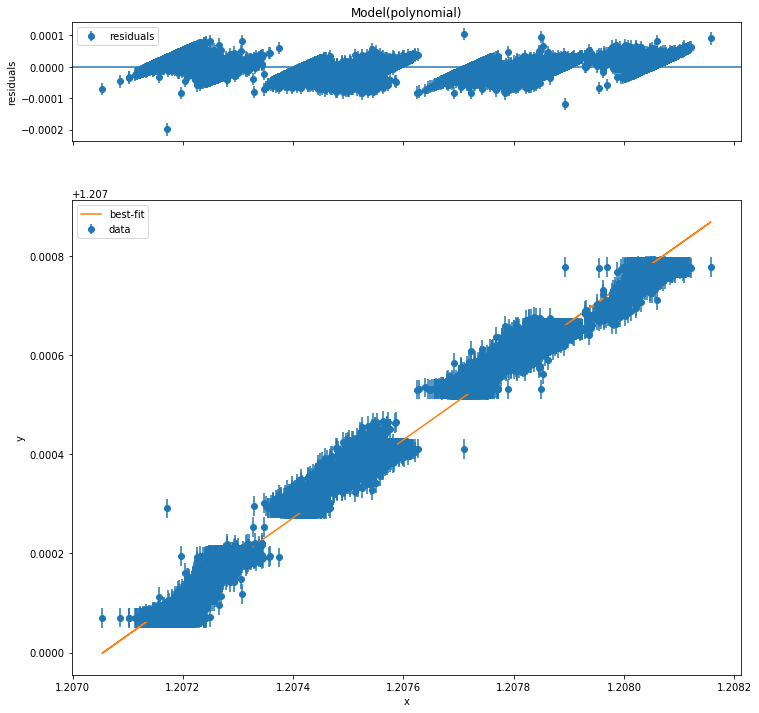

In [117]:
result.plot()

In [132]:
result = polyfit_order_n(8, df_[f"{probe}_Cal_T"], df_["Scaled Hall Voltage"], sigma_B)

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 332
    # data points      = 22119
    # variables        = 9
    chi-square         = 20418.5485
    reduced chi-square = 0.92349835
    Akaike info crit   = -1751.37042
    Bayesian info crit = -1679.33269
[[Variables]]
    N:    8 (fixed)
    C_0: -50834504.7 +/- 1055699.27 (2.08%) (init = 0)
    C_1:  15620950.6 +/- 308635.070 (1.98%) (init = 0)
    C_2: -1738019.29 +/- 34917.8528 (2.01%) (init = 0)
    C_3:  82236.4627 +/- 1684.54182 (2.05%) (init = 0)
    C_4:  26.1596018 +/- 2.07267659 (7.92%) (init = 0)
    C_5: -183.901018 +/- 3.88018188 (2.11%) (init = 0)
    C_6:  8.55395175 +/- 0.18457209 (2.16%) (init = 0)
    C_7: -0.16987719 +/- 0.00374814 (2.21%) (init = 0)
    C_8:  0.00130542 +/- 2.9475e-05 (2.26%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(C_3, C_7) = -1.001
    C(C_1, C_5) = -1.001
    C(C_3, C_6) =  1.001
    C(C_2, C_5) =  1.001

(<Figure size 864x864 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

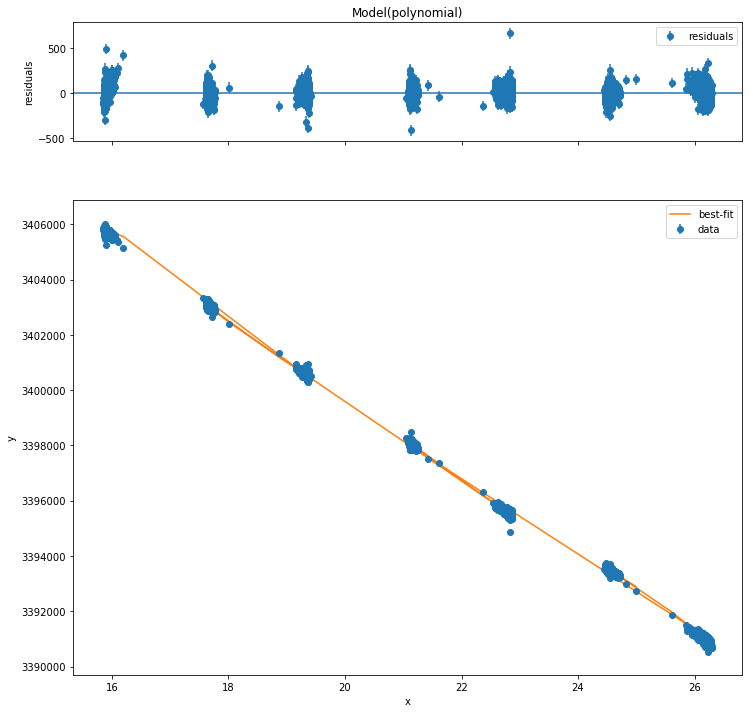

In [133]:
result.plot()

In [169]:
ns

array([35398.,  1270.,  4974.,  1439.,  1403.,  1430.,   204.,  1224.,
        2142.])

In [170]:
ns / ns.mean()

array([6.438081  , 0.23098375, 0.90465605, 0.26172096, 0.25517339,
       0.26008407, 0.0371029 , 0.22261741, 0.38958047])

In [ ]:
x_dat_avg = pd.Series(x_dat_avg)
ys = pd.Series(ys)
yerrs = pd.Series(yerrs)
ns = pd.Series(ns)

In [ ]:
result = polyfit_order_n(1,x_dat_avg, ys, ns.mean()*yerrs / ns)

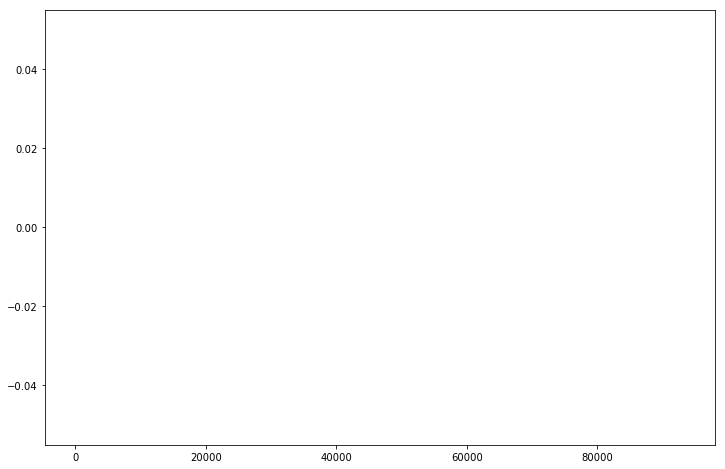

In [171]:
#def chi2(f, x, std):
#        return np.sum(np.square((x-f)/std))

#len(sigma_B)

#len(df_)

#fit_chi2 = chi2(df_["Bmag_lsq"], df_["Scaled Hall Voltage"], sigma_B)
#fit_chi2
fit_chi2 = result.chisqr#0.3247

dof = len(df_) - 5#4 # 4 parameter fit
#dof

n = np.linspace(0,12, 100)

P = stats.chi2.pdf(n, dof)

# 3rd order
plt.plot(n,P)
plt.plot([fit_chi2, fit_chi2],[0., P.max()], 'r--');

In [ ]:
fig = scatter2d(df_.index, df_["DF0000000D5E803A_Cal_Res_Rel"], df_.days_delta, inline=False)

In [ ]:
result.plot()

In [172]:
def plot_polynomial(N, x_dat, y_dat, c_dat, result,
                    size=5, filename=None, inline=False, show_plot=True):
    
    ####averaged=True

    # plot the data
    fig = scatter2d(x_dat,
                    y_dat,
                    c_dat, opacity=0.9, show_plot=False)
    # add line for fit
    xs = np.linspace(x_dat.min(), x_dat.max(), 100)
    ys = result.eval(x=xs)
    fig.add_trace(go.Scatter(
                        x=xs, y=ys,
                        mode='lines', name=f'Order {N} Polynomial fit',#"|V|/|B| = A * Temp. + B",
                        line=dict(color='rgb(78, 42, 132)',#'deeppink',
                                  width=1,
                                  dash='dash')));
    #fig.add_trace(go.Scatter(
    #                    x=ts, y=B_lsq_avg,
    #                    mode='lines', name="mean(|V|/|B|) = A * mean(Temp.) + B",
    #                    line=dict(color='purple', width=1,
    #                              dash='dash')));

    fig.update_traces(marker=dict(size=size));

    '''if averaged:
        fig.add_trace(go.Scatter(
            x= xs,
            y= ys,
            mode='markers',
            name='Averaged Data',
            error_x=dict(
                type='data',
                array=xerrs,
                width=1,
                thickness=1.,
                visible=True),
            error_y=dict(
                type='data',
                array=yerrs,
                width=1,
                thickness=1.,
                visible=True),
            marker=dict(
                size=3,
                color="Red",
            )
        ))'''

    #eqn = f"Volt. = {A_fit:.2E} * Temp. + {B_fit:.2E}"
    eqn = f"y = "
    for n in range(N+1):
        p = result.params[f"C_{n}"]
        eqn += f"{p:.2E} * x^{n}"
        if (n >= 2) and ((n+1)%3 == 0) and (n != N):
            eqn += "<br>    "
    ax = 250
    ay = -25
    if result.params["C_1"] < 0:
        i = 20
        #ax= +
        #ay= -
    else:
        i = -20
        ax = -ax
        ay = -ay
    fig.add_annotation(
        go.layout.Annotation(
                x=xs[i],
                y=ys[i],
                text=eqn,
                font=dict(
                    #family="Courier New, monospace",
                    size=12,
                    color="#ffffff"
                ),
                align="center",
                arrowhead=2,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor="#636363",
                ax=ax,
                ay=ax,
                bordercolor="#c7c7c7",
                borderwidth=2,
                borderpad=4,
                bgcolor='rgb(78, 42, 132)',#"#ff7f0e",
                opacity=0.65,
                showarrow=True#False
        )
    )

    fig.update_layout(title="y vs. x")
    fig.update_xaxes(title_text='x')
    fig.update_yaxes(title_text='y')
    #fig.update_layout( width=1000,height=600,)

    #filename = plotdir+"scaled_voltage_vs_temperature_3rd_order"
    if filename == None:
        if show_plot:
            if inline:
                iplot(fig)
            else:
                plot(fig)
    else:
        if show_plot:
            if inline:
                iplot(fig, filename=filename+'.html')
            else:
                plot(fig, filename=filename+'.html')
        pio.write_image(fig, filename+'.pdf')
        pio.write_image(fig, filename+'.png')
    
    return fig

In [173]:
fig = plot_poly_chi2(4, result)

NameError: name 'plot_poly_chi2' is not defined

In [ ]:
fig = plot_poly_chi2(1, result)

In [ ]:
N = 1
len(result.data) - (N+1) # y values

In [174]:
def plot_poly_chi2(N, result, filename=None, inline=False, show_plot=True):
    dof = len(result.data) - (N+1)
    fit_chi2 = result.chisqr
    P_at_fit = 1.-stats.chi2.cdf(fit_chi2, dof)
    print(f"Probability of Chi2: {P_at_fit}")
    
    lo = min(fit_chi2*0.5, dof / 4)
    hi = max(fit_chi2*1.5, 2*dof*1.5)
    
    n = np.linspace(lo,hi, 1000)

    P = stats.chi2.pdf(n, dof)
    
    n = pd.Series(n, name="Chi^2")
    P = pd.Series(P, name="p.d.f.")
    
    if np.isfinite(P.max()):
        ymax = P.max()
    else:
        ymax = 1.

    fig = scatter2d(n,P, show_plot=False)
    fig.add_trace(go.Scatter(
                            x=[fit_chi2, fit_chi2], y=[0., ymax],
                            mode='lines', name=f'Fit Chi^2 = {fit_chi2}',#"|V|/|B| = A * Temp. + B",
                            line=dict(color='rgb(78, 42, 132)',#'deeppink',
                                      width=1,
                                      dash='dash')));
        
    if filename == None:
        if show_plot:
            if inline:
                iplot(fig)
            else:
                plot(fig)
    else:
        if show_plot:
            if inline:
                iplot(fig, filename=filename+'.html')
            else:
                plot(fig, filename=filename+'.html')
        pio.write_image(fig, filename+'.pdf')
        pio.write_image(fig, filename+'.png')
    
    return fig

In [175]:
fig = plot_poly_chi2(4, result)

Probability of Chi2: 0.0


In [ ]:
len(result.data)

In [ ]:
len(result.params) - 2

In [ ]:
result.chisqr

In [ ]:
result.

In [ ]:
result.eval(x=df[f"{probe}_Cal_T"])

In [ ]:
polynomial(np.array([0,1,2]), len(result.params)-2, **result.params)

In [ ]:
    df_["Bmag_lsq"] = volt_3rd(x_dat, A_fit, B_fit, C_fit, D_fit)
    df_["Bmag_lsq_avg"] = volt_3rd(x_dat, A_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg)

    ts = np.linspace(x_dat.min(), x_dat.max(), 25)

    B_lsq = volt_3rd(ts, A_fit, B_fit, C_fit, D_fit)
    B_lsq_avg = volt_3rd(ts, A_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg)

    B_lsq = pd.Series(B_lsq, name="Stable Temp Fit")
    B_lsq_avg = pd.Series(B_lsq_avg, name="Stable Temp Averaged Fit")

    averaged=True

    fig = scatter2d(x_dat,
                    y_dat,
                    df_.days_delta, opacity=0.8, show_plot=False)

    fig.add_trace(go.Scatter(
                        x=ts, y=B_lsq,
                        mode='lines', name='Linear fit',#"|V|/|B| = A * Temp. + B",
                        line=dict(color='rgb(78, 42, 132)',#'deeppink',
                                  width=1,
                                  dash='dash')));
    #fig.add_trace(go.Scatter(
    #                    x=ts, y=B_lsq_avg,
    #                    mode='lines', name="mean(|V|/|B|) = A * mean(Temp.) + B",
    #                    line=dict(color='purple', width=1,
    #                              dash='dash')));

    fig.update_traces(marker=dict(size=1));

    if averaged:
        fig.add_trace(go.Scatter(
            x= xs,
            y= ys,
            mode='markers',
            name='Averaged Data',
            error_x=dict(
                type='data',
                array=xerrs,
                width=1,
                thickness=1.,
                visible=True),
            error_y=dict(
                type='data',
                array=yerrs,
                width=1,
                thickness=1.,
                visible=True),
            marker=dict(
                size=3,
                color="Red",
            )
        ))

    #eqn = f"Volt. = {A_fit:.2E} * Temp. + {B_fit:.2E}"
    eqn = f"y = {A_fit:.2E} * x + {B_fit:.2E} * x^2 + {C_fit:.2E} * x^3 + {D_fit:.2E}"

    i = 6
    fig.add_annotation(
        go.layout.Annotation(
                x=ts[i],
                y=B_lsq.iloc[i],
                text=eqn,
                font=dict(
                    #family="Courier New, monospace",
                    size=14,
                    color="#ffffff"
                ),
                align="center",
                arrowhead=2,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor="#636363",
                ax=+250,
                ay=-25,
                bordercolor="#c7c7c7",
                borderwidth=2,
                borderpad=4,
                bgcolor='rgb(78, 42, 132)',#"#ff7f0e",
                opacity=0.7,
                showarrow=True#False
        )
    )

    fig.update_layout(title="Scaled Hall Voltage vs. Hall Probe Temperature")
    fig.update_xaxes(title_text='Hall Probe Temperature [deg C]')
    fig.update_yaxes(title_text='|V_Hall| / NMR [micro V / T]')
    fig.update_layout( width=1000,height=600,)

    filename = plotdir+"scaled_voltage_vs_temperature_3rd_order"

    plot(fig, filename=filename+'.html')

    pio.write_image(fig, filename+".pdf")
    pio.write_image(fig, filename+".png")



    def chi2(f, x, std):
        return np.sum(np.square((x-f)/std))

    len(sigma_B)

    len(df_)

    fit_chi2 = chi2(df_["Bmag_lsq"], df_["Scaled Hall Voltage"], sigma_B)
    fit_chi2

    dof = len(df_) - 3#4 # 4 parameter fit
    dof

    n = np.linspace(1000,20000, 1000)

    P = stats.chi2.pdf(n, dof)

    # 3rd order
    plt.plot(n,P)
    plt.plot([fit_chi2, fit_chi2],[0., P.max()], 'r--');

    # 4th order
    plt.plot(n,P)
    plt.plot([fit_chi2, fit_chi2],[0., P.max()], 'r--');

## OLD

In [ ]:
high_point = (df[f"{probe}_Cal_T"] > 20) & (df[f"{probe}_Cal_T"] < 21)
low_point = (df[f"{probe}_Cal_T"] > 16) & (df[f"{probe}_Cal_T"] < 17)
mid_point = (df[f"{probe}_Cal_T"] > 18) & (df[f"{probe}_Cal_T"] < 19)
h = high_point & stable_temp
l = low_point & stable_temp
m = mid_point & stable_temp

In [ ]:
plt.hist(df[h][f"{probe}_Raw_Bmag"]/df[h]["NMR [T]"], bins=50);

In [ ]:
fig = scatter2d(df[h][f"{probe}_Cal_T"], df[h][f"{probe}_Raw_Bmag"]/df[h]["NMR [T]"],
                df[h].days_delta, inline=False)

In [ ]:
hist2 = plt.hist2d(df[h][f"{probe}_Cal_T"], df[h][f"{probe}_Raw_Bmag"]/df[h]["NMR [T]"], bins=35);

In [ ]:
hist2[1]

In [ ]:
36*36

In [ ]:
len(hist2[1])

In [ ]:
len(hist2[2])

In [ ]:
int(np.floor(hist2[0].argmax() / 36))

In [ ]:
int(round(((hist2[0].argmax() / 35) - int(np.floor(hist2[0].argmax() / 35))) * 35))

In [ ]:
1296-int(np.floor(hist2[0].argmax() / 36))*36

In [ ]:
hist2[0][int(np.floor(hist2[0].argmax() / 35)), int(round(((hist2[0].argmax() / 35) - int(np.floor(hist2[0].argmax() / 35))) * 35))]

In [ ]:
for x, y in np.argwhere(hist2[0] == hist2[0].max()):
    # center is between x and x+1
    print(np.average(hist2[1][x:x + 2]), np.average(hist2[2][y:y + 2]))

In [ ]:
(df[h][f"{probe}_Raw_Bmag"]/df[h]["NMR [T]"]).describe()

In [ ]:
df[h][f"{probe}_Cal_T"].describe()

In [ ]:
fig = scatter2d(df[stable_temp].index, df[stable_temp]["Floor"], inline=False)

In [ ]:
fig = scatter2d(df.index, df["Floor"].diff(5).rolling(5).mean(), inline=False)

In [ ]:
df["Roof"].diff(4).plot()

In [ ]:
df["NMR [T]"].plot()
#df["Roof"].diff(1).plot();

In [ ]:
df_ = df[l|m|h]

In [ ]:
def volt(temp, A, B):
    return A * temp + B

In [ ]:
guess = np.array([-1300 / 3.5, 2e6]) # A, B

In [ ]:
x_dat = df_[f"{probe}_Cal_T"]
#x_dat = df[stable_temp][f"{probe}_Cal_T"]

In [ ]:
params, cov = optimization.curve_fit(volt, x_dat, df_[f"{probe}_Raw_Bmag"] / df_["NMR [T]"], guess)
#params, cov = optimization.curve_fit(volt, x_dat, 
#                                     df[stable_temp][f"{probe}_Raw_Bmag"] / df[stable_temp]["NMR [T]"], guess)

In [ ]:
# Bmag ### STABLE TEMP
params, cov

In [ ]:
np.sqrt(cov[0,0])

In [ ]:
cov[0,1] / (np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))

Parameters have strong correlation

In [ ]:
A_fit, B_fit = params

In [ ]:
df_["Bmag_lsq"] = volt(x_dat, A_fit, B_fit)

In [ ]:
p_low = [df[l][f"{probe}_Cal_T"].mean(), (df[l][f"{probe}_Raw_Bmag"]/df[l]["NMR [T]"]).mean()]
p_high = [df[h][f"{probe}_Cal_T"].mean(), (df[h][f"{probe}_Raw_Bmag"]/df[h]["NMR [T]"]).mean()]
p_mid = [df[m][f"{probe}_Cal_T"].mean(), (df[m][f"{probe}_Raw_Bmag"]/df[m]["NMR [T]"]).mean()]

In [ ]:
std_low = [df[l][f"{probe}_Cal_T"].std(), (df[l][f"{probe}_Raw_Bmag"]/df[l]["NMR [T]"]).std()]
std_high = [df[h][f"{probe}_Cal_T"].std(), (df[h][f"{probe}_Raw_Bmag"]/df[h]["NMR [T]"]).std()]
std_mid = [df[m][f"{probe}_Cal_T"].std(), (df[m][f"{probe}_Raw_Bmag"]/df[m]["NMR [T]"]).std()]

In [ ]:
std_low

In [ ]:
fig = scatter2d(df_[f"{probe}_Cal_T"],
                df_[f"{probe}_Raw_Bmag"] / df_["NMR [T]"],
                df_.days_delta, show_plot=False)
#d = [df[f"{probe}_Raw_X"].min(), df[f"{probe}_Raw_X"].max()]
fig.add_trace(go.Scatter(
                    x=df_[f"{probe}_Cal_T"], y=df_["Bmag_lsq"],
                    mode='lines', name="|V|/|B| = A * Temp. + B",
                    line=dict(color='deeppink', width=1,
                              dash='dash')));
#plot(fig)

fig.update_traces(marker=dict(size=1));
#plot(fig);

fig.add_trace(go.Scatter(
    x= [p_low[0],p_mid[0],p_high[0]],
    y=[p_low[1],p_mid[1],p_high[1]],
    mode='markers',
    name='averaged_data',
    error_x=dict(
        type='data',
        array=[std_low[0], std_mid[0], std_high[0]],
        width=1,
        thickness=1.,
        visible=True),
    error_y=dict(
        type='data',
        array=[std_low[1], std_mid[1], std_high[1]],
        width=1,
        thickness=1.,
        visible=True),
    marker=dict(
        size=4,
        color="Red",
    )
))

fig.update_layout(title="Scaled Hall Voltage vs. Hall Probe Temperature")
fig.update_xaxes(title_text='Hall Probe Temperature [deg C]')
fig.update_yaxes(title_text='|V_Hall| / NMR [micro V / T]')
fig.update_layout( width=1200,height=900,)

#fig = go.Figure(traces)
plot(fig, filename=plotdir+"temp_fit_2point_aggregate.html")

In [ ]:
pio.write_image(fig, plotdir+"temp_fit_2point_aggregate.pdf")
pio.write_image(fig, plotdir+"temp_fit_2point_aggregate.png")

In [ ]:
std_low

In [ ]:
std_mid

In [ ]:
std_high

In [ ]:
### pick std = 55
std_volt = 45.#55.

In [ ]:
def chi2(f, x, std):
    return np.sum(np.square((x-f)/std))

In [ ]:
fit_chi2 = chi2(df_["Bmag_lsq"], df_[f"{probe}_Raw_Bmag"]/df_["NMR [T]"], std_volt)
fit_chi2

In [ ]:
# check std
df_2 = df_[100:500]

In [ ]:
fig = scatter2d(df_2.index, df_2[f"{probe}_Raw_Bmag"]/df_2["NMR [T]"],
               inline=False)

In [ ]:
scaled_B = df_2[f"{probe}_Raw_Bmag"]/df_2["NMR [T]"]
scaled_B.name = "Scaled |V|/|B|"

In [ ]:
fig = histo(scaled_B, bins=25,
               inline=False)

In [ ]:
dof = len(df_) - 2
dof

In [ ]:
stats.chi2.pdf(6300, 6325)

In [ ]:
n = np.linspace(0, 7000, 1000)

In [ ]:
P = stats.chi2.pdf(n, dof)

In [ ]:
plt.plot(n,P)
plt.plot([fit_chi2, fit_chi2],[0., P.max()], 'r--');

In [ ]:
n[P.argmax()]

## Magnet Behavior

In [ ]:
probes

In [ ]:
x_dat = df.index
y_dat = df[f"{probes[0]}_Raw_X"]

In [ ]:
fig = scatter2d(x_dat, y_dat, df.days_delta, inline=False)